# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/circuit.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/circuit_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3007871989121989
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.007217703498396
              precision    recall  f1-score   support

           1       0.49      0.75      0.59       252
           2       0.53      0.68      0.60       252
           3       0.40      0.46      0.43       252
           4       0.31      0.38      0.34       252
           5       0.28      0.36      0.31       252
           6       0.30      0.42      0.35       252
           7       0.23      0.38      0.28       252
           8       0.28      0.29      0.28       252
           9       0.25      0.24      0.24       252
          10       0.20      0.24      0.22       252
          11       0.25      0.31      0.27       252
          12       0.22      0.29      0.25       252
          13       0.24      0.23      0.23       252
          14 

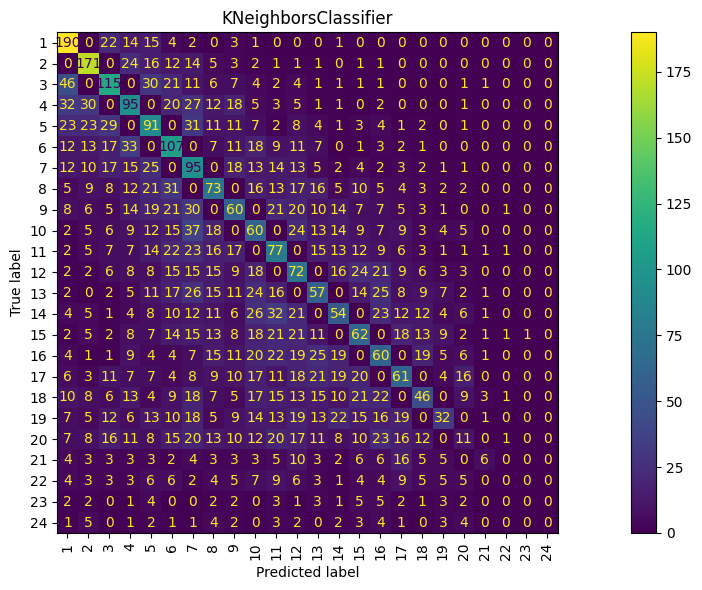

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.26279372983918436
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.550051927791198
              precision    recall  f1-score   support

           1       0.40      0.78      0.53       252
           2       0.54      0.69      0.60       252
           3       0.30      0.38      0.34       252
           4       0.34      0.35      0.34       252
           5       0.21      0.26      0.23       252
           6       0.21      0.37      0.27       252
           7       0.24      0.33      0.28       252
           8       0.23      0.24      0.23       252
           9       0.21      0.23      0.22       252
          10       0.19      0.23      0.21       252
          11       0.19      0.23      0.21       252
          12       0.17      0.18      0.18       252
          13       0.22      0.23      0.22       252
          14

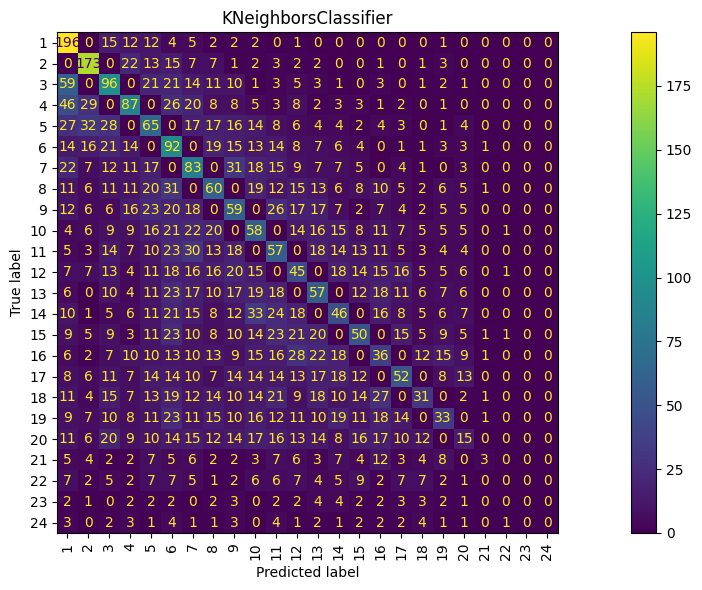

In [4]:
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3489335958654141
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5353825268397703
              precision    recall  f1-score   support

           1       0.67      0.81      0.73       252
           2       0.57      0.73      0.64       252
           3       0.53      0.62      0.57       252
           4       0.37      0.50      0.43       252
           5       0.37      0.42      0.39       252
           6       0.44      0.45      0.44       252
           7       0.21      0.37      0.26       252
           8       0.43      0.37      0.40       252
           9       0.18      0.23      0.20       252
          10       0.49      0.33      0.39       252
          11       0.19      0.33      0.24       252
          12       0.22      0.40      0.29       252
          13       0.30      0.26      0.28       252
          14

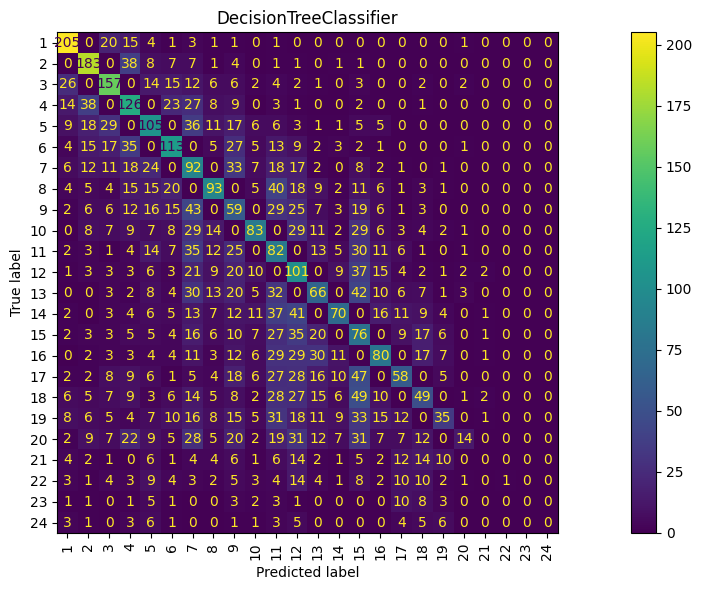

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitLng",
        "circuitAlt",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34148298250570974
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.574442620483242
              precision    recall  f1-score   support

           1       0.67      0.81      0.73       252
           2       0.58      0.74      0.65       252
           3       0.55      0.63      0.59       252
           4       0.35      0.47      0.40       252
           5       0.36      0.41      0.38       252
           6       0.34      0.46      0.39       252
           7       0.22      0.38      0.28       252
           8       0.44      0.33      0.37       252
           9       0.19      0.21      0.20       252
          10       0.49      0.32      0.38       252
          11       0.14      0.28      0.19       252
          12       0.28      0.38      0.33       252
          13       0.24      0.23      0.24       252
          14

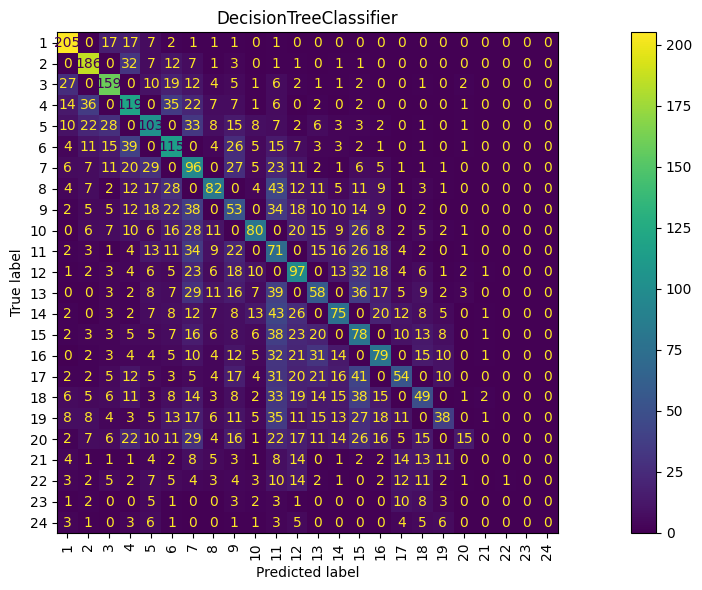

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35447847396711035
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.491795388588652
              precision    recall  f1-score   support

           1       0.56      0.85      0.67       252
           2       0.64      0.81      0.72       252
           3       0.49      0.62      0.55       252
           4       0.39      0.55      0.46       252
           5       0.40      0.40      0.40       252
           6       0.33      0.39      0.36       252
           7       0.28      0.38      0.32       252
           8       0.38      0.31      0.34       252
           9       0.24      0.24      0.24       252
          10       0.35      0.21      0.27       252
          11       0.31      0.33      0.32       252
          12       0.17      0.37      0.23       252
          13       0.31      0.35      0.33     

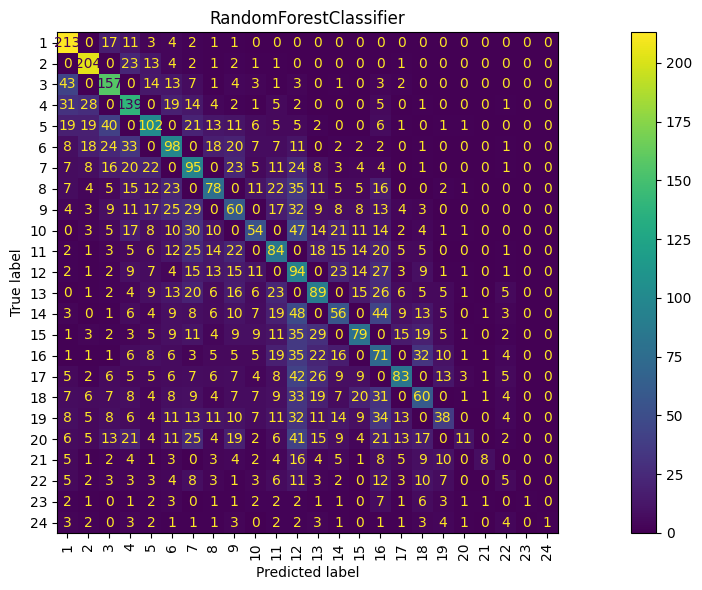

In [7]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorNationality",
        "raceRound",
        "driverWins",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.33972148642603184
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5460809839336846
              precision    recall  f1-score   support

           1       0.50      0.90      0.65       252
           2       0.61      0.81      0.70       252
           3       0.46      0.50      0.48       252
           4       0.36      0.46      0.40       252
           5       0.39      0.39      0.39       252
           6       0.26      0.41      0.31       252
           7       0.30      0.37      0.33       252
           8       0.38      0.24      0.29       252
           9       0.24      0.21      0.22       252
          10       0.26      0.22      0.24       252
          11       0.30      0.37      0.33       252
          12       0.18      0.34      0.24       252
          13       0.30      0.32      0.31    

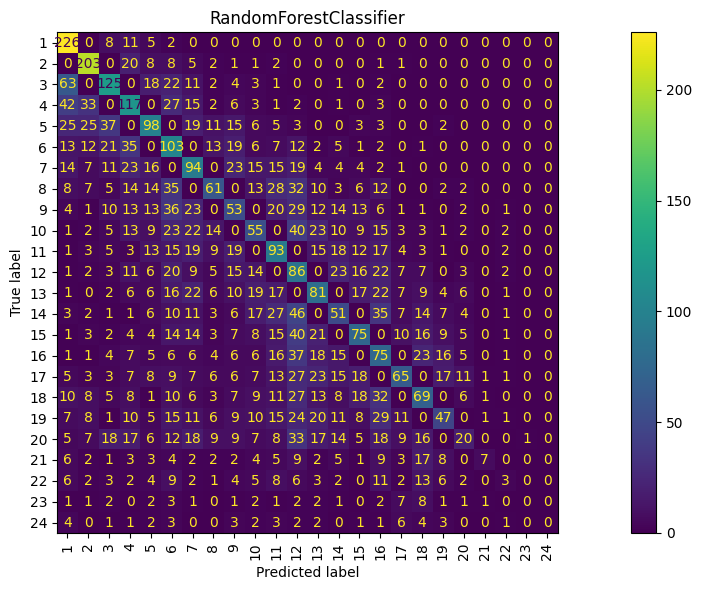

In [8]:
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)


model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3543670681170682
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.408429693376581
              precision    recall  f1-score   support

           1       0.55      0.89      0.68       252
           2       0.63      0.76      0.69       252
           3       0.52      0.52      0.52       252
           4       0.41      0.46      0.44       252
           5       0.33      0.46      0.39       252
           6       0.33      0.48      0.39       252
           7       0.29      0.40      0.34       252
           8       0.43      0.28      0.34       252
           9       0.24      0.23      0.23       252
          10       0.37      0.35      0.36       252
          11       0.16      0.31      0.21       252
          12       0.34      0.35      0.34       252
          13       0.26      0.22      0.24       252
 

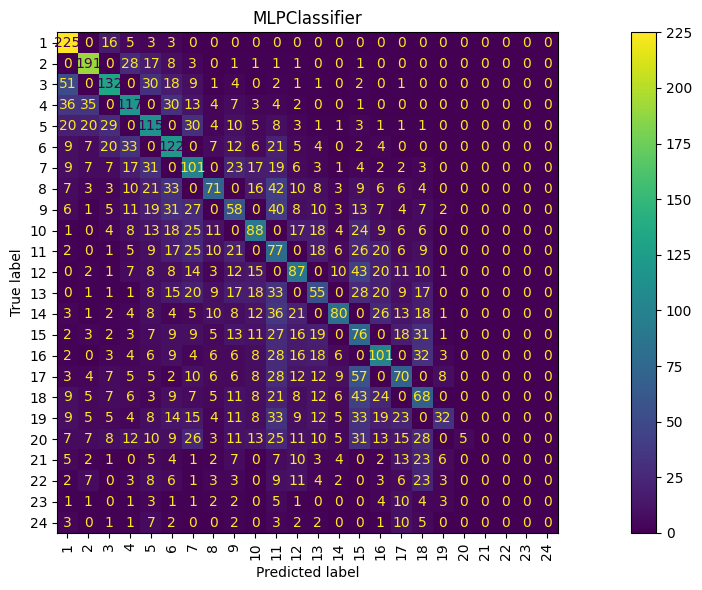

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNumber",
        "constructorRef",
        "raceRound",
        "circuitCountry",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "driverAgeToday",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3486279902757175
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.444713251727771
              precision    recall  f1-score   support

           1       0.52      0.88      0.65       252
           2       0.68      0.80      0.73       252
           3       0.50      0.47      0.49       252
           4       0.43      0.48      0.45       252
           5       0.40      0.48      0.44       252
           6       0.29      0.48      0.36       252
           7       0.31      0.42      0.36       252
           8       0.35      0.30      0.32       252
           9       0.28      0.24      0.26       252
          10       0.37      0.31      0.34       252
          11       0.18      0.29      0.22       252
          12       0.34      0.37      0.35       252
          13       0.21      0.25      0.23       252
 

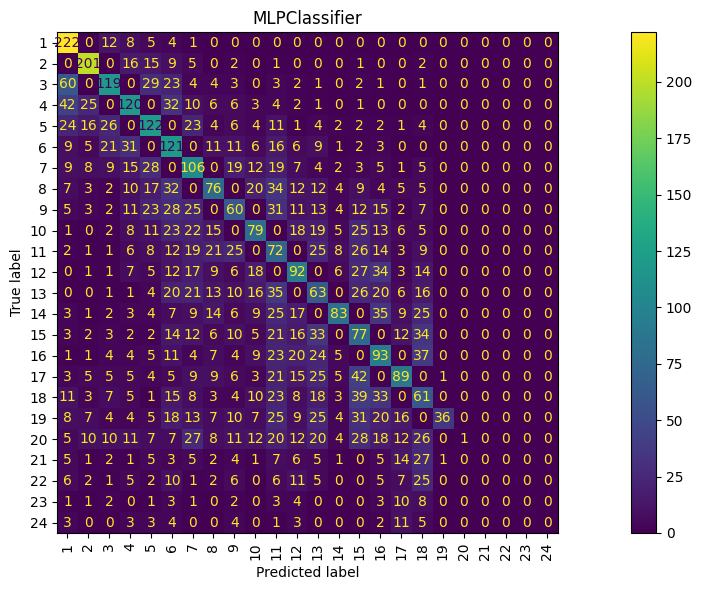

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, in this case, performance has not been improved.
